# Import Libraries

In [1]:
import copy 

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score

# Load Data

In [2]:
TrainData=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Data Sets/train-Assignment6.csv")
Engineered_Data=copy.deepcopy(TrainData)

In [3]:
TrainData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
TrainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

# Count missing values in each column

In [5]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
TrainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
MissingVal=TrainData.isnull().sum()
MissingVal=MissingVal[MissingVal>0].sort_values()
MissingVal

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<Axes: >

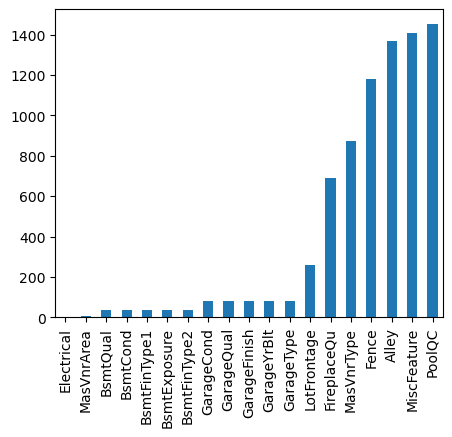

In [8]:
MissingVal.plot(kind="bar",figsize=(5,4))


# Feature Engineering

Check fields with large missing data from the description:


*   PoolQC means Pool Quality and NA means No Pool (it is not a missing value and it will impact the peroformance). You will notice that values are (Ex	Excellent, Gd	Good, TA	Average/Typical, Fa	Fair, NA	No Pool). The order here make sense
*   Find and replace is the best approach in this case





In [9]:
# create a dictionary use table names and values
PoolQC_Dict={"NA":0,"Ex":4,"Gd":3,"TA":2,"Fa":1}
Engineered_Data["PoolQC"]=Engineered_Data["PoolQC"].map(PoolQC_Dict)
Engineered_Data["PoolQC"].fillna(0,inplace=True)

In [10]:
Engineered_Data["PoolQC"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
Name: PoolQC, Length: 1460, dtype: float64

In [11]:
TrainData["PoolQC"].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


*   MiscFeature includes: Elev	Elevator, Gar2	2nd Garage (if not
described in garage section), Othr	Other, Shed	Shed (over 100 SF), TenC	Tennis Court, NA	None
*    Replacing NA with the most frequent term does not make sense here
*    We can use None as a separate category
*    One hot encoding will be a good choice here



In [12]:
MiscFeature_Dict={"Elevator":"Elev","2nd Garage":"Gar2","Other":"Othr",
                  "Shed (over 100 SF)":"Shed","Tennis Court":"TenC","None":"NA"}

MiscFeature=pd.DataFrame(TrainData["MiscFeature"])

MiscFeature["MiscFeature"].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [13]:
# "Shed" is the most frequent value in the "MiscFeature" column  so we will replace the "NA" value by it.
Engineered_Data["MiscFeature"].fillna("Shed", inplace=True)
Engineered_Data["MiscFeature"].value_counts()

MiscFeature
Shed    1455
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [14]:
OHE=ce.OneHotEncoder()
Encoded_MiscFeatures=OHE.fit_transform(Engineered_Data["MiscFeature"])

In [15]:
Encoded_MiscFeatures = Encoded_MiscFeatures.rename(columns={"MiscFeature_1": "Shed", "MiscFeature_2": "Gar2", "MiscFeature_3": "Othr", "MiscFeature_4": "TenC"})
Encoded_MiscFeatures

,Shed,Gar2,Othr,TenC
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,1,0,0,0
1456,1,0,0,0
1457,1,0,0,0
1458,1,0,0,0


In [16]:
Engineered_Data.drop(columns="MiscFeature",inplace=True)

In [17]:
Engineered_Data=pd.concat([Engineered_Data,Encoded_MiscFeatures],axis=1)
Engineered_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Shed,Gar2,Othr,TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,1,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,1,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,1,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,1,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,1,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,1,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2500,5,2010,WD,Normal,266500,1,0,0,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,1,0,0,0


Alley: Type of alley access to property. The field values are defined as:
*   Grvl	Gravel
*   Pave	Paved
*   NA 	No alley access

Similar to MiscFeature, we can use None as a separate category and One hot encoding will be a good choice here

In [18]:
Dict={"Gravel":"Grvl","Paved":"Pave","No alley access":"NA"}

Alley=pd.DataFrame(TrainData["Alley"])

Alley.value_counts()


Alley
Grvl     50
Pave     41
Name: count, dtype: int64

In [19]:
# "Grvl" is the most frequent value so will replace "NaN" by it
Alley=Alley.fillna("Grvl")

In [20]:
Alley.head()

,Alley
0,Grvl
1,Grvl
2,Grvl
3,Grvl
4,Grvl


In [21]:
OHE=ce.OneHotEncoder()
Encoded_Alley=OHE.fit_transform(Engineered_Data["Alley"])

In [22]:
Encoded_Alley=Encoded_Alley.rename(columns={"Alley_3":"Grvl","Alley_2":"Pave"})
Encoded_Alley=Encoded_Alley.drop(columns="Alley_1")
Engineered_Data=Engineered_Data.drop(columns="Alley")

In [23]:
Engineered_Data=pd.concat([Engineered_Data,Encoded_Alley],axis=1)

In [24]:
Engineered_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,Shed,Gar2,Othr,TenC,Pave,Grvl
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,1,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,1,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,1,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,1,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,1,0,0,0,0,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,1,0,0,0,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,1,0,0,0,0,1
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,1,0,0,0,0,1


Fence: Fence quality.  The field values are defined as
*   GdPrv	Good Privacy
*   MnPrv	Minimum Privacy
*   GdWo	Good Wood
*   MnWw	Minimum Wood/Wire
*   NA	No Fence

We will use the above technique      

In [25]:
TrainData["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [26]:
Engineered_Data["Fence"].fillna("MnPrv",inplace=True)

In [27]:
Engineered_Data["Fence"].value_counts()

Fence
MnPrv    1336
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [28]:
EncodedFence=OHE.fit_transform(Engineered_Data["Fence"])

In [29]:
EncodedFence=EncodedFence.rename(columns={"Fence_1":"MnPrv","Fence_3":"GdPrv","Fence_2":"GdWo","Fence_4":"MnWw"})

In [30]:
Engineered_Data=pd.concat([Engineered_Data,EncodedFence],axis=1)

In [31]:
Engineered_Data.drop(columns="Fence",inplace=True)
Engineered_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Shed,Gar2,Othr,TenC,Pave,Grvl,MnPrv,GdWo,GdPrv,MnWw
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,1,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,0,0,0,1,1,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,1,1,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,1,0,0,0,0,1,1,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,1,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,1,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,1,0,0,0


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


We will use find and replace


In [32]:
Engineered_Data["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [33]:
ReplaceValues={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
Engineered_Data["FireplaceQu"].fillna(0,inplace=True)

In [34]:
Engineered_Data["FireplaceQu Encoded"]=Engineered_Data["FireplaceQu"].map(ReplaceValues)

In [35]:
Engineered_Data.drop(columns="FireplaceQu",inplace=True)

In [36]:
Engineered_Data["FireplaceQu Encoded"].fillna(0,inplace=True)
Engineered_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Gar2,Othr,TenC,Pave,Grvl,MnPrv,GdWo,GdPrv,MnWw,FireplaceQu Encoded
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,1,0,0,0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,1,0,0,0,3.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,1,0,0,0,3.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,1,0,0,0,4.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,1,0,0,0,3.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,1,0,0,0,3.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,1,0,4.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,1,0,0,0,0.0


In [37]:
Engineered_Data["FireplaceQu Encoded"].isna().count()

1460

The last item is the lot frontage (واجهة الشارع).Linear feet of street connected to property.


We may use the median in this case


In [38]:
Med=Engineered_Data["LotFrontage"].median()
Engineered_Data["LotFrontage"].fillna(Med,inplace=True)

In [39]:
# Similarly, we fix GarageCond using find and replace
Engineered_Data["GarageCond"].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [40]:
Engineered_Data["GarageCond"].isna().sum()

81

In [41]:
# The na values are little values, so we can fill it with TA because it the most frequent value

ReplaceValues={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
Engineered_Data["GarageCond"]=Engineered_Data["GarageCond"].map(ReplaceValues)
Engineered_Data["GarageCond"].fillna("TA",inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24184\2285767176.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Engineered_Data["GarageCond"].fillna("TA",inplace=True)


In [42]:
# for GarageType, NA means no garage
Engineered_Data["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [43]:
Engineered_Data["GarageType"].isna().sum()

81

In [44]:
ReplaceValues={"Attchd":6,"Detchd":5,"BuiltIn":4,"Basment":3,"CarPort":2,"2Types":1}
Engineered_Data["GarageType"]=Engineered_Data["GarageType"].map(ReplaceValues)
Engineered_Data["GarageType"].fillna(0,inplace=True)

In [45]:
Engineered_Data["GarageType"]

0       6.0
1       6.0
2       6.0
3       5.0
4       6.0
       ... 
1455    6.0
1456    6.0
1457    6.0
1458    6.0
1459    6.0
Name: GarageType, Length: 1460, dtype: float64

In [46]:
# for MasVnrType  Masonry veneer type, None means no Maonry veneer
Engineered_Data["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [47]:
ReplaceValues={"BrkFace":3,"Stone":2,"BrkCmn":1}
Engineered_Data["MasVnrType"]=Engineered_Data["MasVnrType"].map(ReplaceValues)
Engineered_Data["MasVnrType"].fillna(0,inplace=True)

In [48]:
# for Area, can can use the median
med=Engineered_Data["PoolArea"].median()
Engineered_Data["PoolArea"]=Engineered_Data["PoolArea"].fillna(med)

In [49]:
med=Engineered_Data["GarageArea"].median()
Engineered_Data["GarageArea"]=Engineered_Data["GarageArea"].fillna(med)

In [50]:
med=Engineered_Data["GrLivArea"].median()
Engineered_Data["GrLivArea"]=Engineered_Data["GrLivArea"].fillna(med)

In [51]:
med=Engineered_Data["LotArea"].median()
Engineered_Data["LotArea"]=Engineered_Data["LotArea"].fillna(med)

In [52]:
# for Electrical, we can use the most frequent label (gets index 0).
Engineered_Data["Electrical"]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [53]:
Engineered_Data["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [54]:
ReplaceValues={"SBrkr":5,"FuseA":4,"FuseF":3,"FuseP":2,"Mix":1}
Engineered_Data["Electrical"]=Engineered_Data["Electrical"].map(ReplaceValues)
Engineered_Data["Electrical"].fillna("SBrkr",inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24184\2190839638.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SBrkr' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Engineered_Data["Electrical"].fillna("SBrkr",inplace=True)


In [55]:
# we completed these with large number of missing values, let's replace

#fill NAN values as well
TestData=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Data Sets/test -Assignmment6.csv")
WorkData=copy.deepcopy(TestData)
WorkData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Check missing values one more time

In [60]:
print(Engineered_Data['GarageYrBlt'].isna().sum())

81


For the GarageYrBlt I will convert it to categorical to show how old the garage

1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,MISSING,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,MISSING,0,4,2010,WD,Normal,142125


We can do similar analysis to transform other features such as HeatingQC, ExterQual, etc. (try it yourself)

# Missing data test



Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
MSZoning        4
dtype: int64

# Encoding

<1460x9013 sparse matrix of type '<class 'numpy.float64'>'
	with 116800 stored elements in Compressed Sparse Row format>

# First Model

LinearRegression()

7.462000773076586
0.9999999988168303
